In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Create sample dataset
data_path = 'bills.csv'
if not os.path.exists(data_path):
    data = """Date,Customer,Truck No,Trip,Rate,Amount,Challan No
2024-01-03,Aqua Tech,MH01AA1234,3,500,1500,CH001
2024-01-10,Sai Enterprises,MH02BB5678,2,450,900,CH002
2024-02-14,RainDrop Ltd,MH03CC9999,1,600,600,CH003
2024-02-20,Aqua Tech,MH01AA1234,2,550,1100,CH004
2024-03-05,Sai Enterprises,MH02BB5678,4,500,2000,CH005
2024-04-18,Fresh Flow,MH04DD1234,5,700,3500,CH006
2024-05-01,RainDrop Ltd,MH03CC9999,1,650,650,CH007
2024-05-15,Aqua Tech,MH01AA1234,2,600,1200,CH008
2025-04-28,Sai Enterprises,MH02BB5678,3,480,1440,CH009
2025-05-20,Fresh Flow,MH04DD1234,1,700,700,CH010"""

    with open(data_path, 'w') as f:
        f.write(data)


In [3]:
# Step 1: Load the dataset
df = pd.read_csv('bills.csv', parse_dates=['Date'])
print("Initial Data Info:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        10 non-null     datetime64[ns]
 1   Customer    10 non-null     object        
 2   Truck No    10 non-null     object        
 3   Trip        10 non-null     int64         
 4   Rate        10 non-null     int64         
 5   Amount      10 non-null     int64         
 6   Challan No  10 non-null     object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 692.0+ bytes
Initial Data Info:
 None


In [4]:
# Step 2: Data Cleaning
df = df.drop_duplicates()
df = df.dropna()
df = df[(df['Trip'] > 0) & (df['Amount'] > 0)]
df = df[(df['Rate'] >= 400) & (df['Rate'] <= 1000)]

# Ensure correct data types
df['Trip'] = df['Trip'].astype(int)
df['Rate'] = df['Rate'].astype(int)
df['Amount'] = df['Amount'].astype(int)
df['Challan No'] = df['Challan No'].astype(str)
df['Truck No'] = df['Truck No'].astype(str)
df = df.reset_index(drop=True)
print("\nCleaned Data Info:\n", df.info())

# Step 3: Feature Engineering
df['Month'] = df['Date'].dt.to_period('M')
df['Day'] = df['Date'].dt.day_name()
df['Month Name'] = df['Date'].dt.month_name()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        10 non-null     datetime64[ns]
 1   Customer    10 non-null     object        
 2   Truck No    10 non-null     object        
 3   Trip        10 non-null     int64         
 4   Rate        10 non-null     int64         
 5   Amount      10 non-null     int64         
 6   Challan No  10 non-null     object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 692.0+ bytes

Cleaned Data Info:
 None


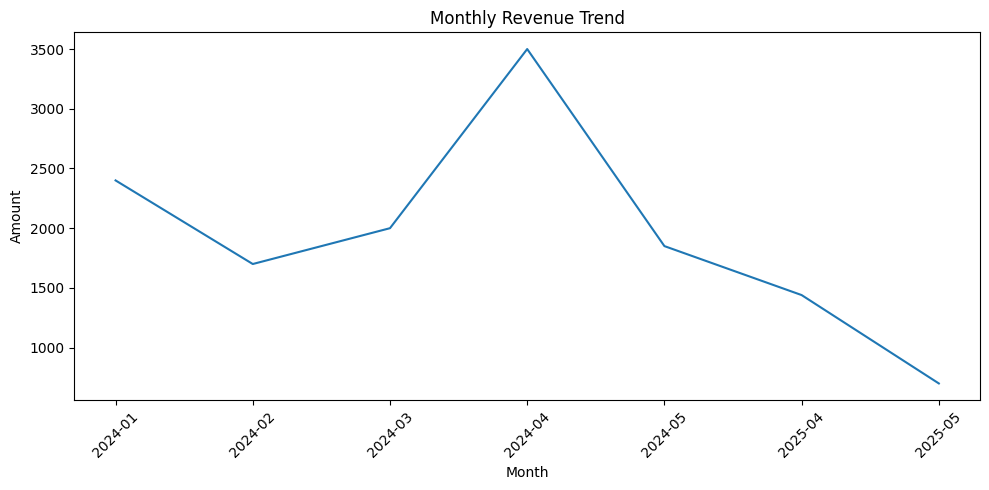

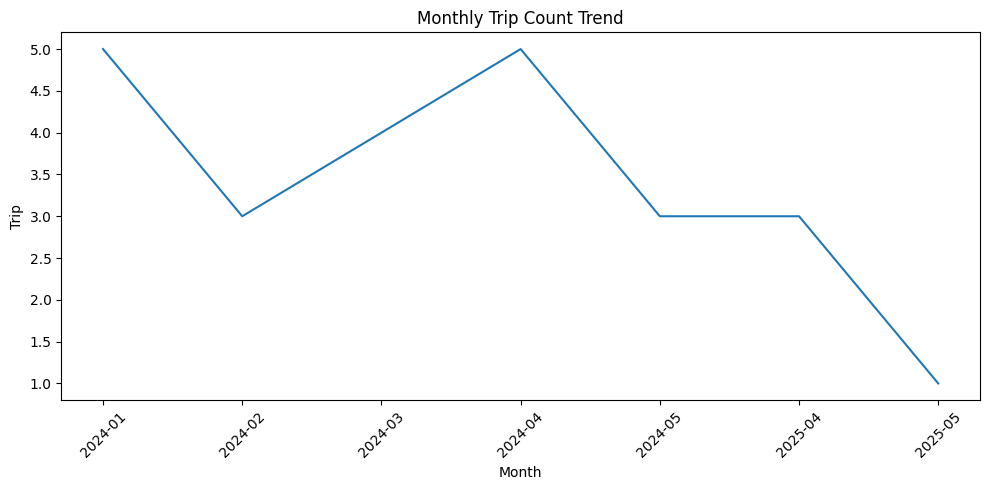

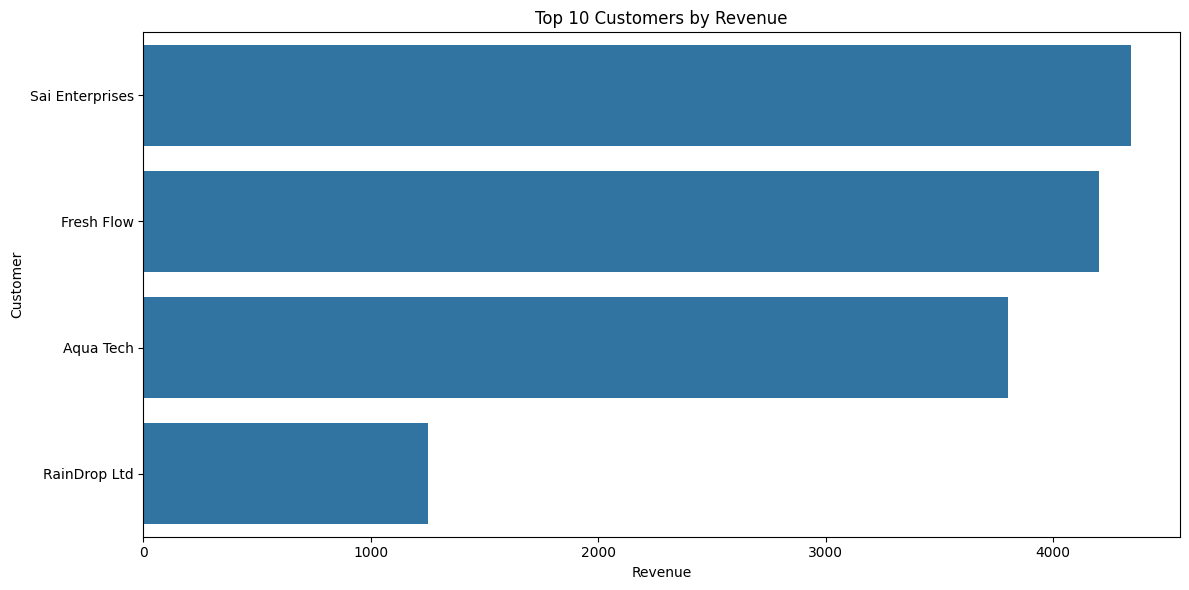

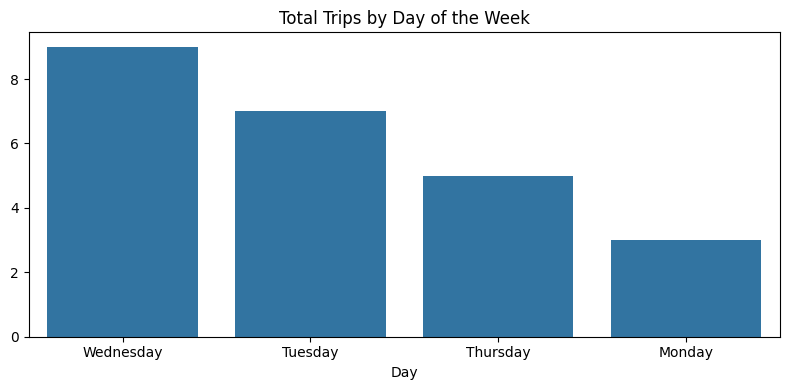

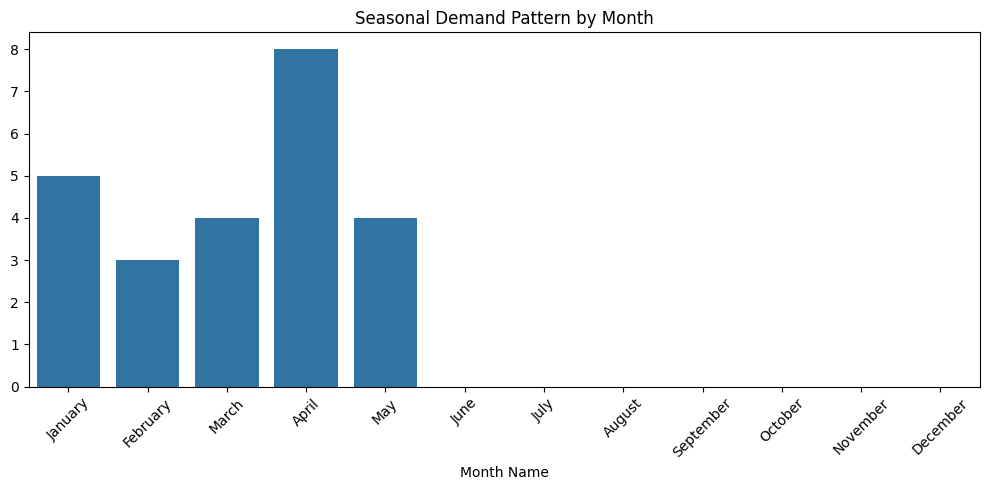

In [5]:
# Step 4: Exploratory Data Analysis (EDA)
monthly_data = df.groupby('Month')[['Trip', 'Amount']].sum().reset_index()
monthly_data['Month'] = monthly_data['Month'].astype(str)

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_data, x='Month', y='Amount')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_data, x='Month', y='Trip')
plt.title('Monthly Trip Count Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_customers = df.groupby('Customer')['Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_customers.values, y=top_customers.index)
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Revenue')
plt.tight_layout()
plt.show()

trip_by_day = df.groupby('Day')['Trip'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=trip_by_day.index, y=trip_by_day.values)
plt.title('Total Trips by Day of the Week')
plt.tight_layout()
plt.show()

seasonal_demand = df.groupby('Month Name')['Trip'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'])
plt.figure(figsize=(10,5))
sns.barplot(x=seasonal_demand.index, y=seasonal_demand.values)
plt.title('Seasonal Demand Pattern by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
# Step 5: Forecasting Next Month's Trips and Revenue
monthly_data_forecast = df.groupby('Month')[['Trip', 'Amount']].sum()
avg_trips = monthly_data_forecast['Trip'].mean()
avg_revenue = monthly_data_forecast['Amount'].mean()
print("Predicted Trips Next Month:", round(avg_trips))
print("Predicted Revenue Next Month: ₹", round(avg_revenue))

monthly_growth = monthly_data_forecast['Amount'].diff()
print("Monthly Revenue Growth:\n", monthly_growth)

Predicted Trips Next Month: 3
Predicted Revenue Next Month: ₹ 1941
Monthly Revenue Growth:
 Month
2024-01       NaN
2024-02    -700.0
2024-03     300.0
2024-04    1500.0
2024-05   -1650.0
2025-04    -410.0
2025-05    -740.0
Freq: M, Name: Amount, dtype: float64


In [7]:
# Step 6: Customer Segmentation
def label(trips):
    if trips >= 15:
        return 'Regular'
    elif trips >= 5:
        return 'Medium'
    else:
        return 'Rare'

trip_count = df.groupby('Customer')['Trip'].sum()
customer_type = trip_count.apply(label)
print("Customer Segments:\n", customer_type)

Customer Segments:
 Customer
Aqua Tech          Medium
Fresh Flow         Medium
RainDrop Ltd         Rare
Sai Enterprises    Medium
Name: Trip, dtype: object


In [8]:
# Step 7: Data Validation Checks
duplicates = df[df.duplicated('Challan No', keep=False)]
print("Duplicate Challans:\n", duplicates)

bad_rates = df[(df['Rate'] < 400) | (df['Rate'] > 1000)]
print("Out-of-range Rates:\n", bad_rates)

Duplicate Challans:
 Empty DataFrame
Columns: [Date, Customer, Truck No, Trip, Rate, Amount, Challan No, Month, Day, Month Name]
Index: []
Out-of-range Rates:
 Empty DataFrame
Columns: [Date, Customer, Truck No, Trip, Rate, Amount, Challan No, Month, Day, Month Name]
Index: []


In [9]:
# Step 8: Identify Declining Customers
recent = df[df['Date'] > '2025-05-01']
old = df[df['Date'] <= '2025-05-01']
old_total = old.groupby('Customer')['Trip'].sum()
recent_total = recent.groupby('Customer')['Trip'].sum()
compare = pd.DataFrame({'Old Trips': old_total, 'Recent Trips': recent_total})
compare['Change'] = compare['Recent Trips'] - compare['Old Trips']
compare = compare.sort_values('Old Trips', ascending=False)
print("Customer Trend Comparison:\n", compare.head(5))

Customer Trend Comparison:
                  Old Trips  Recent Trips  Change
Customer                                        
Sai Enterprises          9           NaN     NaN
Aqua Tech                7           NaN     NaN
Fresh Flow               5           1.0    -4.0
RainDrop Ltd             2           NaN     NaN


In [10]:
# Step 9: Profit Calculation  (₹250 cost per trip)
cost_per_trip = 250
df['Profit'] = (df['Rate'] - cost_per_trip) * df['Trip']
total_profit = df['Profit'].sum()
print("Total Profit: ₹", total_profit)

Total Profit: ₹ 7590


In [11]:
# Step 10: Truck-level Analysis
trips_per_truck = df.groupby('Truck No')['Trip'].sum()
revenue_per_truck = df.groupby('Truck No')['Amount'].sum()
print("Trips per Truck:\n", trips_per_truck)
print("Revenue per Truck:\n", revenue_per_truck)

Trips per Truck:
 Truck No
MH01AA1234    7
MH02BB5678    9
MH03CC9999    2
MH04DD1234    6
Name: Trip, dtype: int64
Revenue per Truck:
 Truck No
MH01AA1234    3800
MH02BB5678    4340
MH03CC9999    1250
MH04DD1234    4200
Name: Amount, dtype: int64


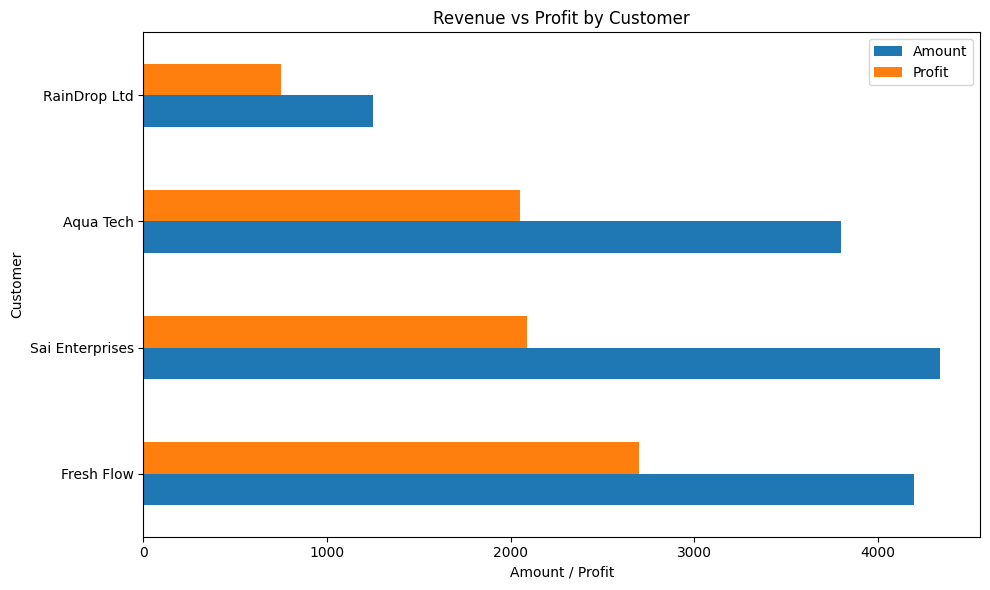

In [12]:
# -------------------- ADDITIONAL VISUALIZATIONS --------------------
# Profit vs Revenue by Customer
profit_by_customer = df.groupby('Customer')[['Amount', 'Profit']].sum().sort_values('Profit', ascending=False)
profit_by_customer.plot(kind='barh', figsize=(10,6))
plt.title('Revenue vs Profit by Customer')
plt.xlabel('Amount / Profit')
plt.tight_layout()
plt.show()

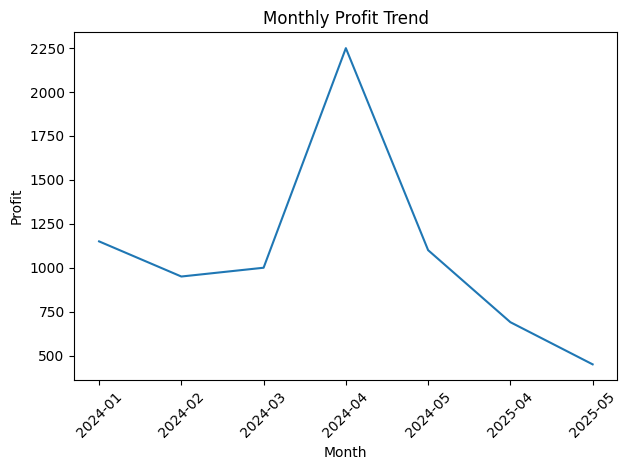

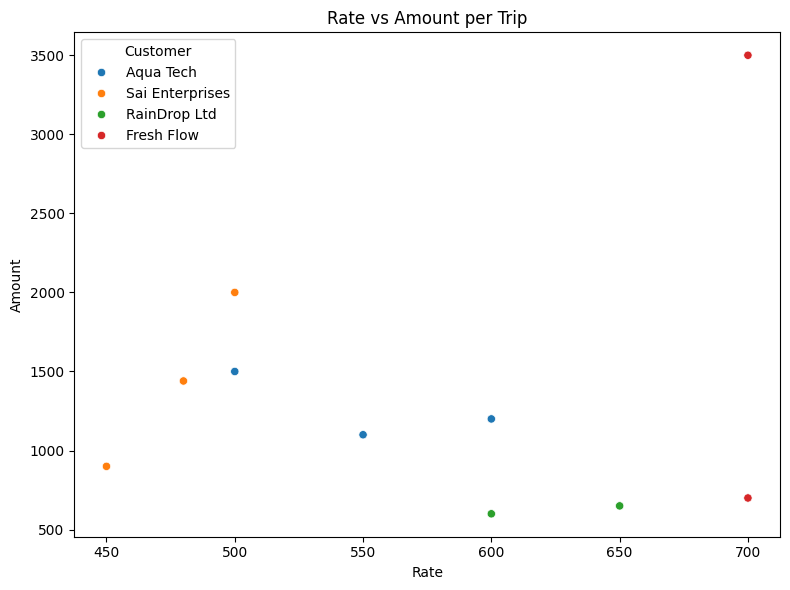

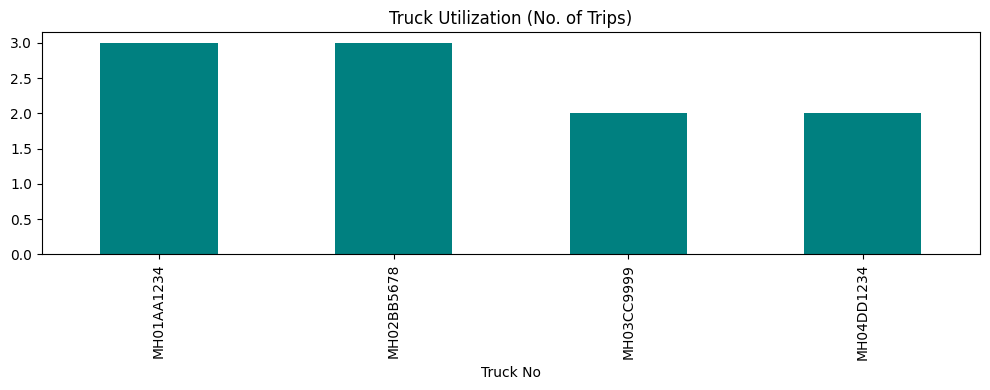

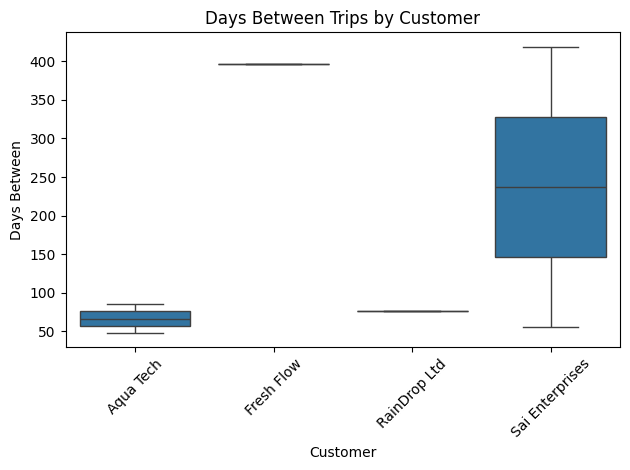

In [13]:
# Monthly Profit Trend
monthly_profit = df.groupby('Month')['Profit'].sum().reset_index()
monthly_profit['Month'] = monthly_profit['Month'].astype(str)
sns.lineplot(data=monthly_profit, x='Month', y='Profit')
plt.title('Monthly Profit Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Rate vs Amount per Trip
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Rate', y='Amount', hue='Customer')
plt.title('Rate vs Amount per Trip')
plt.tight_layout()
plt.show()

# Truck Utilization
truck_usage = df.groupby('Truck No')['Trip'].count().sort_values(ascending=False)
truck_usage.plot(kind='bar', figsize=(10,4), color='teal')
plt.title('Truck Utilization (No. of Trips)')
plt.tight_layout()
plt.show()

# Time Between Trips per Customer
df_sorted = df.sort_values(['Customer', 'Date'])
df_sorted['Days Between'] = df_sorted.groupby('Customer')['Date'].diff().dt.days
sns.boxplot(data=df_sorted, x='Customer', y='Days Between')
plt.title('Days Between Trips by Customer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


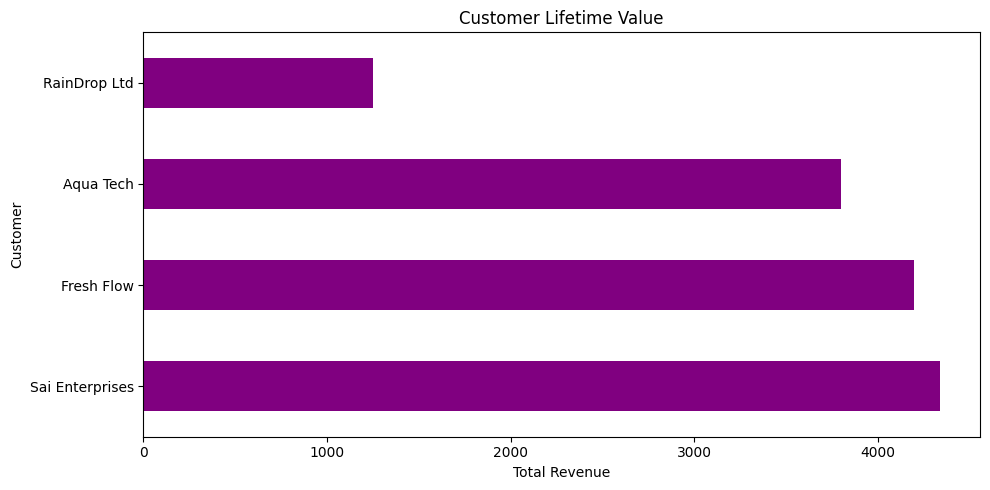

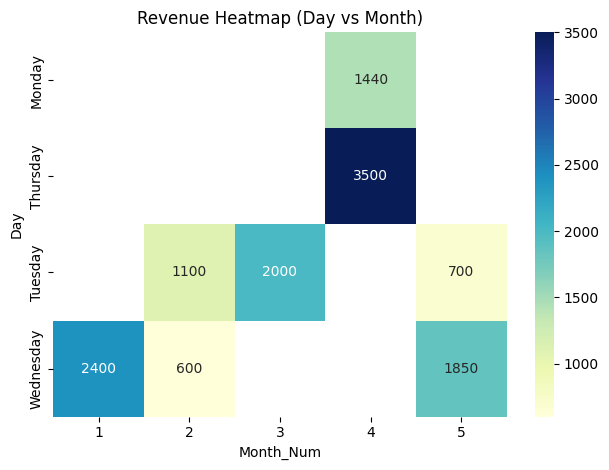

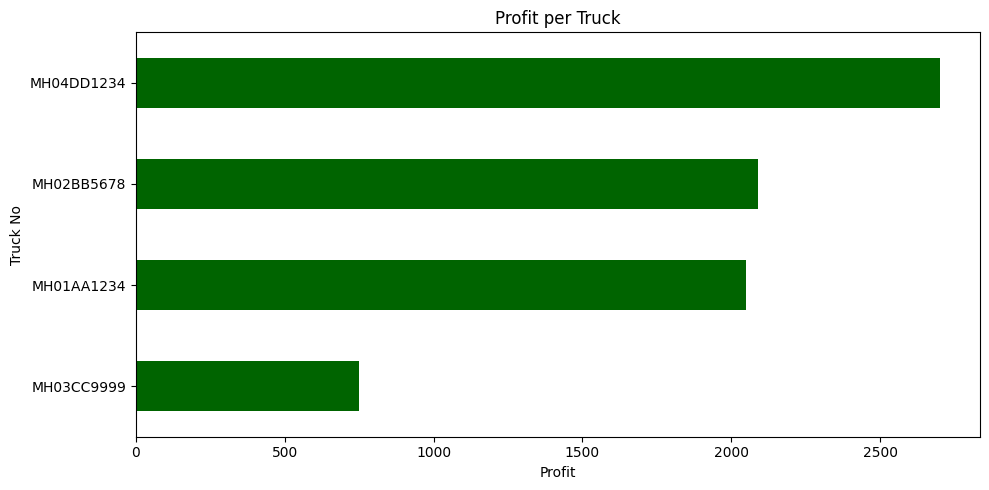

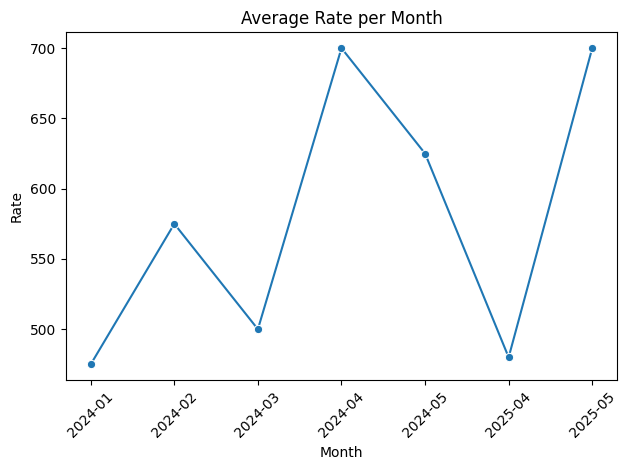

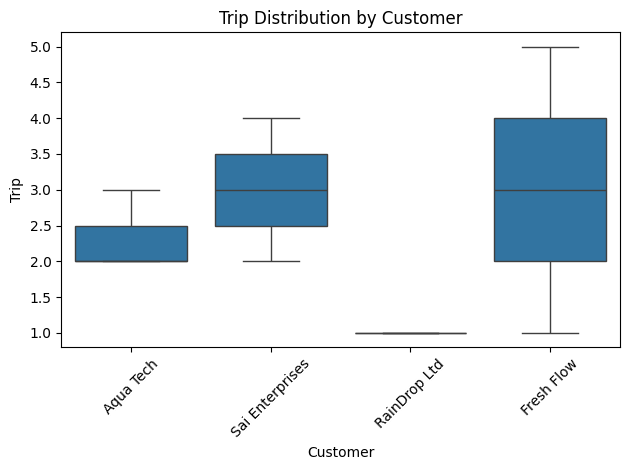

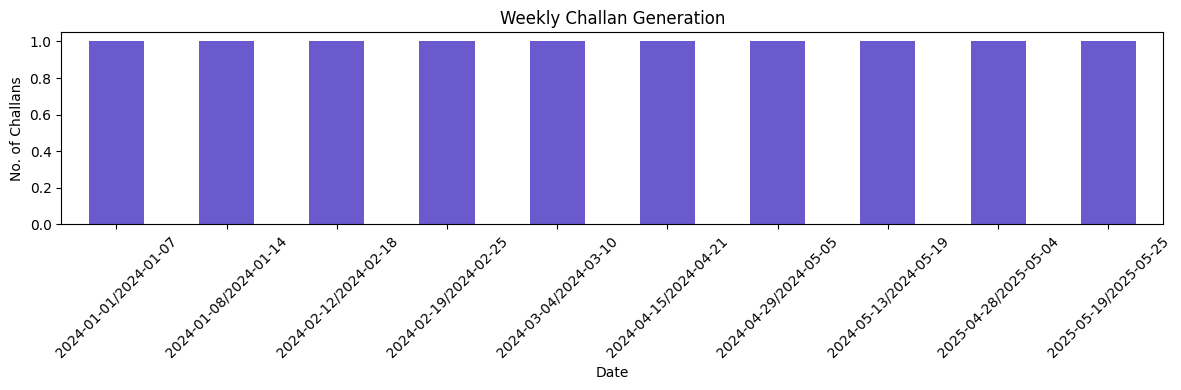

In [14]:
# Customer Lifetime Value
clv = df.groupby('Customer')['Amount'].sum().sort_values(ascending=False)
clv.plot(kind='barh', figsize=(10,5), color='purple')
plt.title('Customer Lifetime Value')
plt.xlabel('Total Revenue')
plt.tight_layout()
plt.show()

# Revenue Heatmap (Day vs Month)
df['Month_Num'] = df['Date'].dt.month
heatmap_data = df.pivot_table(values='Amount', index='Day', columns='Month_Num', aggfunc='sum')
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Revenue Heatmap (Day vs Month)')
plt.tight_layout()
plt.show()

# Profit per Truck
profit_truck = df.groupby('Truck No')['Profit'].sum().sort_values()
profit_truck.plot(kind='barh', figsize=(10,5), color='darkgreen')
plt.title('Profit per Truck')
plt.xlabel('Profit')
plt.tight_layout()
plt.show()

# Monthly Average Rate
avg_rate = df.groupby('Month')['Rate'].mean().reset_index()
avg_rate['Month'] = avg_rate['Month'].astype(str)
sns.lineplot(data=avg_rate, x='Month', y='Rate', marker='o')
plt.title('Average Rate per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Trip Distribution by Customer
sns.boxplot(data=df, x='Customer', y='Trip')
plt.title('Trip Distribution by Customer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Weekly Challan Frequency
challan_freq = df.groupby(df['Date'].dt.to_period('W'))['Challan No'].count()
challan_freq.plot(kind='bar', figsize=(12,4), color='slateblue')
plt.title('Weekly Challan Generation')
plt.ylabel('No. of Challans')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# Step 11: Save Cleaned Data
df.to_csv('cleaned_bills.csv', index=False)
print("Cleaned data saved to cleaned_bills.csv")

Cleaned data saved to cleaned_bills.csv
